In [2]:
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt

CATEGORIES = ["AFDB_face_dataset_balanced", "AFDB_masked_face_dataset"]

def prepare(filepath):
    IMG_SIZE = 50
    img_array = cv2.imread(filepath, cv2.IMREAD_COLOR)
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    plt.imshow(new_array, cmap="gray")
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 3)

model = tf.keras.models.load_model("64x3-CNN.model")


In [5]:
import sys

imagePath = "mercy.jpg"
image = cv2.imread(imagePath)
image = cv2.resize(image, (image.shape[1] // 4, image.shape[0] // 4))
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
faces = faceCascade.detectMultiScale(
    gray,
    scaleFactor=1.3,
    minNeighbors=3,
    minSize=(30, 30)
)

print("[INFO] Found {0} Faces.".format(len(faces)))

for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
    roi_color = image[y:y + h, x:x + w]
    print("[INFO] Object found. Saving locally.")
    cv2.imwrite("cropface.jpg", roi_color)

if len(faces) != 0:
    print("[INFO] Image cropface.jpg written to filesystem")

[INFO] Found 1 Faces.
[INFO] Object found. Saving locally.
[INFO] Image cropface.jpg written to filesystem


masked


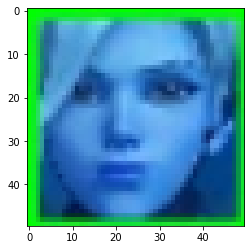

In [6]:
prediction = model.predict([prepare("cropface.jpg")])
if int(prediction[0][0]) == 0:
    print("unmasked")
else:
    print("masked")